In [22]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
anscombe = pd.read_csv('../datasets/anscombe.csv', header=[0,1])
bees = pd.read_csv('../datasets/bee_sperm.csv', comment='#')
literacy_fertility = pd.read_csv('../datasets/female_literacy_fertility.csv')
beaks_1975 = pd.read_csv('../datasets/finch_beaks_1975.csv')
beaks_2012 = pd.read_csv('../datasets/finch_beaks_2012.csv')
frogs = pd.read_csv('../datasets/frog_tongue.csv', comment='#')
mlb = pd.read_csv('../datasets/mlb_nohitters.csv')
weather = pd.read_csv('../datasets/sheffield_weather_station.csv', comment='#', delimiter='\s+', na_values='---')
illiteracy = literacy_fertility['female literacy']*-1+100
fertility = literacy_fertility.fertility
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat =  np.corrcoef(x, y) 

    # Return entry [0,1]
    return corr_mat[0,1]


# Generating bootstrap replicates

### Visualizing bootstrap samples

In [24]:
rainfall = weather.rain

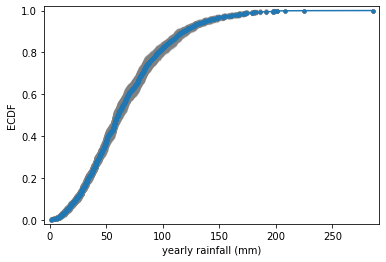

In [25]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Bootstrap confidence intervals

### Generating many bootstrap replicates

In [26]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### Bootstrap replicates of the mean and the SEM

0.9488593574676786
0.9333572733101179


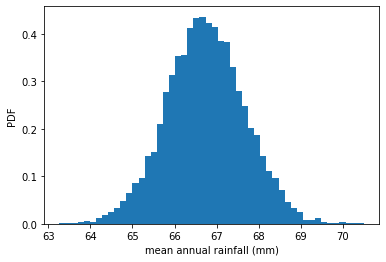

In [27]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
size = 10000
data = rainfall
func = np.mean
bs_replicates = draw_bs_reps(data=data, func=func, size=size)

# Compute and print SEM
sem = np.std(data) / np.sqrt(len(data))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
# changed the normed argument to density to keep with most up to date package.
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Bootstrap replicates of other statistics

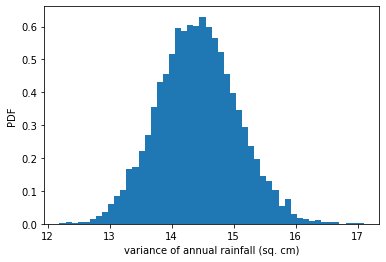

In [28]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
size = 10000
data = rainfall
func = np.var
bs_replicates = draw_bs_reps(data=data, func=func, size=size)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
# changed the normed argument to density to keep with most up to date package.
_ = plt.hist(bs_replicates, density=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Confidence interval on the rate of no-hitters

95% confidence interval = [663.39920319 871.01623506] games


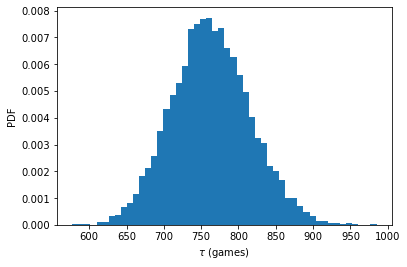

In [29]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
size = 10000
data = nohitter_times
func = np.mean
bs_replicates = draw_bs_reps(data=data, func=func, size=size)

# Compute the 95% confidence interval: conf_int
percentiles = [2.5, 97.5]
conf_int = np.percentile(bs_replicates, percentiles)

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
# changed the normed argument to density to keep with most up to date package.
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Pairs bootstrap

### A function to do pairs bootstrap

In [30]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


### Pairs bootstrap of literacy/fertility data

[0.04395979 0.05565012]


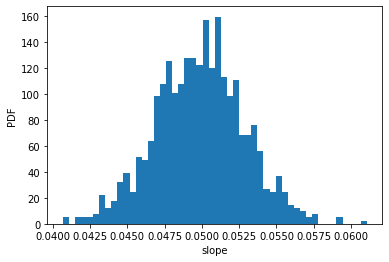

In [32]:
# Generate replicates of slope and intercept using pairs bootstrap
size = 1000
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x=illiteracy, y=fertility, size=size)

# Compute and print 95% CI for slope
percentiles = [2.5, 97.5]
print(np.percentile(bs_slope_reps, percentiles))

# Plot the histogram
# changed the normed argument to density to keep with most up to date package.
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

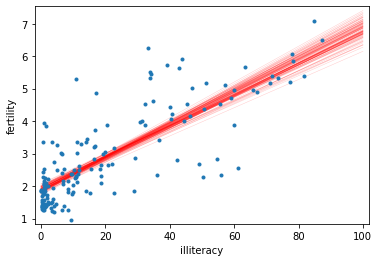

In [33]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(0, 100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] *x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()